<a href="https://colab.research.google.com/github/Playcrusher/Algo-project-2/blob/main/BayesianLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install pymc

Output()

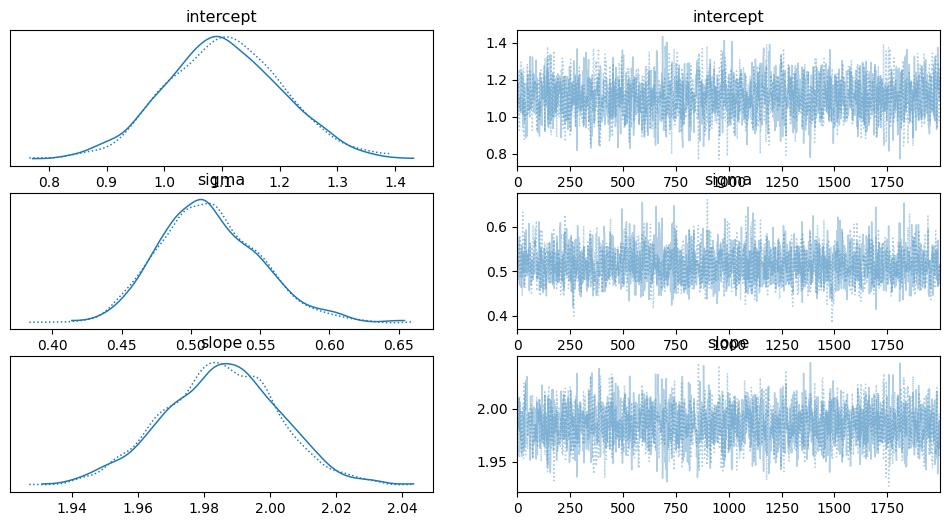

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pymc as pm
from multiprocessing import freeze_support
import os

# Set enviroment variable for MKL threading layer tf needed
os.environ["MKL_THREADINNG_LAYER"] = "GNU"

# Generate snthetic data
np.random.seed(0)
X = np.linspace(0, 10, 100)
true_slope = 2
true_intercept = 1
true_sigma = 0.5
y = true_slope * X + true_intercept + np.random.normal(0, true_sigma, size=len(X))

# Set THeano flag if needed
# import theano
# theano.config.blas__check_openmp = False

if __name__ == '__main__':
  freeze_support()

  # Define Bayesian Liear Regressio model
  with pm.Model() as model:
    # Priors for parameters
    sigma = pm.HalfNormal("sigma", sigma=1)
    intercept = pm.Normal("intercept", mu=0, sigma=10)
    slope = pm.Normal("slope", mu=0, sigma=10)

    # Likelihood
    likelihood = pm.Normal("y", mu=intercept + slope * X, sigma=sigma, observed=y) # Corrected the likelihood

    # Fit model using Bayesian Inference
    trace = pm.sample(2000, tune=1000)

  # Plot posterior distribution of parameters
  # pm.traceplot(trace) # traceplot is deprecated in PyMC v4+
  # plt.show()
  import arviz as az
  az.plot_trace(trace)
  plt.show()